<a href="https://colab.research.google.com/github/HSSunag/Final-Project/blob/master/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy
import keras
import os
import tensorflow as tf

dataset_dir="drive/My Drive/DataSet/Training/cat"
def images_to_array(dataset_dir, image_size):
    dataset_array = []
    dataset_labels = []

    class_counter = 0

    classes_names = os.listdir(dataset_dir)
    for current_class_name in classes_names:
        class_dir = os.path.join(dataset_dir, current_class_name)
        images_in_class = os.listdir(class_dir)

        print("Class index", class_counter, ", ", current_class_name, ":" , len(images_in_class))

        for image_file in images_in_class:
            if image_file.endswith(".jpg"):
              image_file_dir = os.path.join(class_dir, image_file)

              img = keras.preprocessing.image.load_img(image_file_dir, target_size=(image_size, image_size))
              img_array = keras.preprocessing.image.img_to_array(img)

              img_array = img_array/255.0

              dataset_array.append(img_array)
              dataset_labels.append(class_counter)
        class_counter = class_counter + 1
    dataset_array = numpy.array(dataset_array)
    dataset_labels = numpy.array(dataset_labels)
    return dataset_array, dataset_labels



train_dir = "drive/My Drive/DataSet/Training/cat"
image_size = 128
train_dataset_array, train_dataset_array_labels = images_to_array(dataset_dir=train_dir, image_size=image_size)
print("Training Data Array Shape :", train_dataset_array.shape)
numpy.save("train_dataset_array.npy", train_dataset_array)
numpy.save("train_dataset_array_labels.npy", train_dataset_array_labels)

test_dir = "drive/My Drive/DataSet/Testing/test"
test_dataset_array, test_dataset_array_labels = images_to_array(dataset_dir=test_dir, image_size=image_size)
print("Test Data Array Shape :", test_dataset_array.shape)
numpy.save("test_dataset_array.npy", test_dataset_array)
numpy.save("test_dataset_array_labels.npy", test_dataset_array_labels)

Using TensorFlow backend.


Class index 0 ,  cat3 : 7
Class index 1 ,  cat2 : 7
Class index 2 ,  cat1 : 7
Training Data Array Shape : (21, 128, 128, 3)
Class index 0 ,  tes2 : 3
Class index 1 ,  tes1 : 4
Class index 2 ,  tes3 : 3
Test Data Array Shape : (9, 128, 128, 3)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model = Sequential()

In [0]:
model.add(Conv2D(128, (5, 5), activation='relu', input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(256, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax')) 

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [42]:
hist = model.fit(train_dataset_array, train_dataset_array_labels,
           batch_size=3, epochs=10, validation_split=0.3 )

ValueError: ignored

In [43]:
print(train_dataset_array_labels)

[0 0 0 0 0 0 0 1 1 1 1 1 1 1 2 2 2 2 2 2 2]


In [0]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(train_dataset_array_labels)
y_test_one_hot = to_categorical(test_dataset_array_labels)

In [45]:
hist = model.fit(train_dataset_array, y_train_one_hot,
           batch_size=3, epochs=10, validation_split=0.3 )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 14 samples, validate on 7 samples
Epoch 1/10





14/14 [==============================] - 8s 550ms/step - loss: 1.2261 - acc: 0.5000 - val_loss: 2.4883 - val_acc: 0.0000e+00
Epoch 2/10
14/14 [==============================] - 6s 427ms/step - loss: 0.7617 - acc: 0.5000 - val_loss: 5.1136 - val_acc: 0.0000e+00
Epoch 3/10
14/14 [==============================] - 6s 423ms/step - loss: 0.6835 - acc: 0.5000 - val_loss: 6.1564 - val_acc: 0.0000e+00
Epoch 4/10
14/14 [==============================] - 6s 424ms/step - loss: 0.4884 - acc: 0.7143 - val_loss: 14.6872 - val_acc: 0.0000e+00
Epoch 5/10
14/14 [==============================] - 6s 424ms/step - loss: 1.1992 - acc: 0.7143 - val_loss: 10.3600 - val_acc: 0.0000e+00
Epoch 6/10
14/14 [==============================] - 6s 417ms/step - loss: 0.5673 - acc: 0.7143 - val_loss: 3.9457 - val_acc: 0.0000e+00
Epoch 7/10
14/14 [===================

In [46]:
model.evaluate(test_dataset_array, y_test_one_hot)

9/9 [==============================] - 1s 102ms/step


[6.437524795532227, 0.3333333432674408]

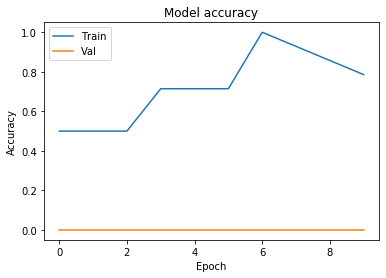

In [47]:
#Visualize the models accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [48]:
print(hist.history['acc'])

[0.5000000127724239, 0.5000000127724239, 0.5000000127724239, 0.7142857249294009, 0.7142857142857143, 0.7142857185431889, 1.0, 0.9285714328289032, 0.8571428614003318, 0.7857142921004977]
